In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

In [2]:
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.size']=14

In [3]:
CDM_i_1 = tcDM_i_1 = CDM_i_2 = tcDM_i_2 = 1

snap = h5py.File('/home/ryan/Data/Data0/snaps/run_2cDM_L3N256_DM_powerm2m2_sigma1/snap_00{}.hdf5'.format(CDM_i_1), 'r')

fpath = '/home/ryan/Downloads/plots_L3N256_powerlaws/'

pkpath_1 = '/home/ryan/genPK/run_L3N256_DM_lower_softening/'
pkpath_2 = '/home/ryan/genPK/run_L3N256_DM_power00_sigma1/'

pkpath_3 = '/home/ryan/genPK/run_L3N256_DM_powerm2m2_sigma0.1/'
pkpath_4 = '/home/ryan/genPK/run_L3N256_DM_powerm2m2_sigma1/'


In [4]:
def calculate_fourier_conversion(Boxsize):
    '''
    Takes the Boxsize in kpc and produces the conversion factors
    from Fourier units to physical units. For use with genPK output.
    '''
    Boxsize = Boxsize / 1000 # convert to Mpc

    k_conv = 2*np.pi / Boxsize
    p_conv = (Boxsize / (2 * np.pi))**3
    
    return k_conv, p_conv

In [5]:
redshift =float("{:.2f}".format(snap['Header'].attrs['Redshift']))

boxsize = int((snap['Header'].attrs['BoxSize'])) # in kpc

k_conv_1, p_conv_1 = calculate_fourier_conversion(boxsize)
k_conv_2, p_conv_2 = calculate_fourier_conversion(boxsize)

In [6]:
def get_genPK_data(fpath, k_conv, p_conv):
    
    genPK = np.loadtxt(fpath)
    
    bins = genPK[:, 0]
    pk = genPK[:, 1]
    
    dk = pk * (2 * np.pi)**3 * (4 * np.pi) * bins**3
    
    bins = genPK[:, 0] * k_conv
    
    pk = genPK[:, 1] * p_conv
    
    return bins, pk, dk

In [7]:
# get DM data for both

cdm_str = 'PK-DM-snap_00{}_CDM.hdf5'
tcdm_str = 'PK-DM-snap_00{}_2cDM.hdf5'

bins_cdm_1, pk_cdm_1, dk_cdm_1 = get_genPK_data(pkpath_1 + cdm_str.format(CDM_i_1),\
                                                k_conv_1, p_conv_1)
bins_2cdm_1, pk_2cdm_1, dk_2cdm_1 = get_genPK_data(pkpath_1 + tcdm_str.format(tcDM_i_1),\
                                                k_conv_1, p_conv_1)

bins_2cdm_2, pk_2cdm_2, dk_2cdm_2 = get_genPK_data(pkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

bins_2cdm_3, pk_2cdm_3, dk_2cdm_3 = get_genPK_data(pkpath_3 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

bins_2cdm_4, pk_2cdm_4, dk_2cdm_4 = get_genPK_data(pkpath_4 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)


In [8]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


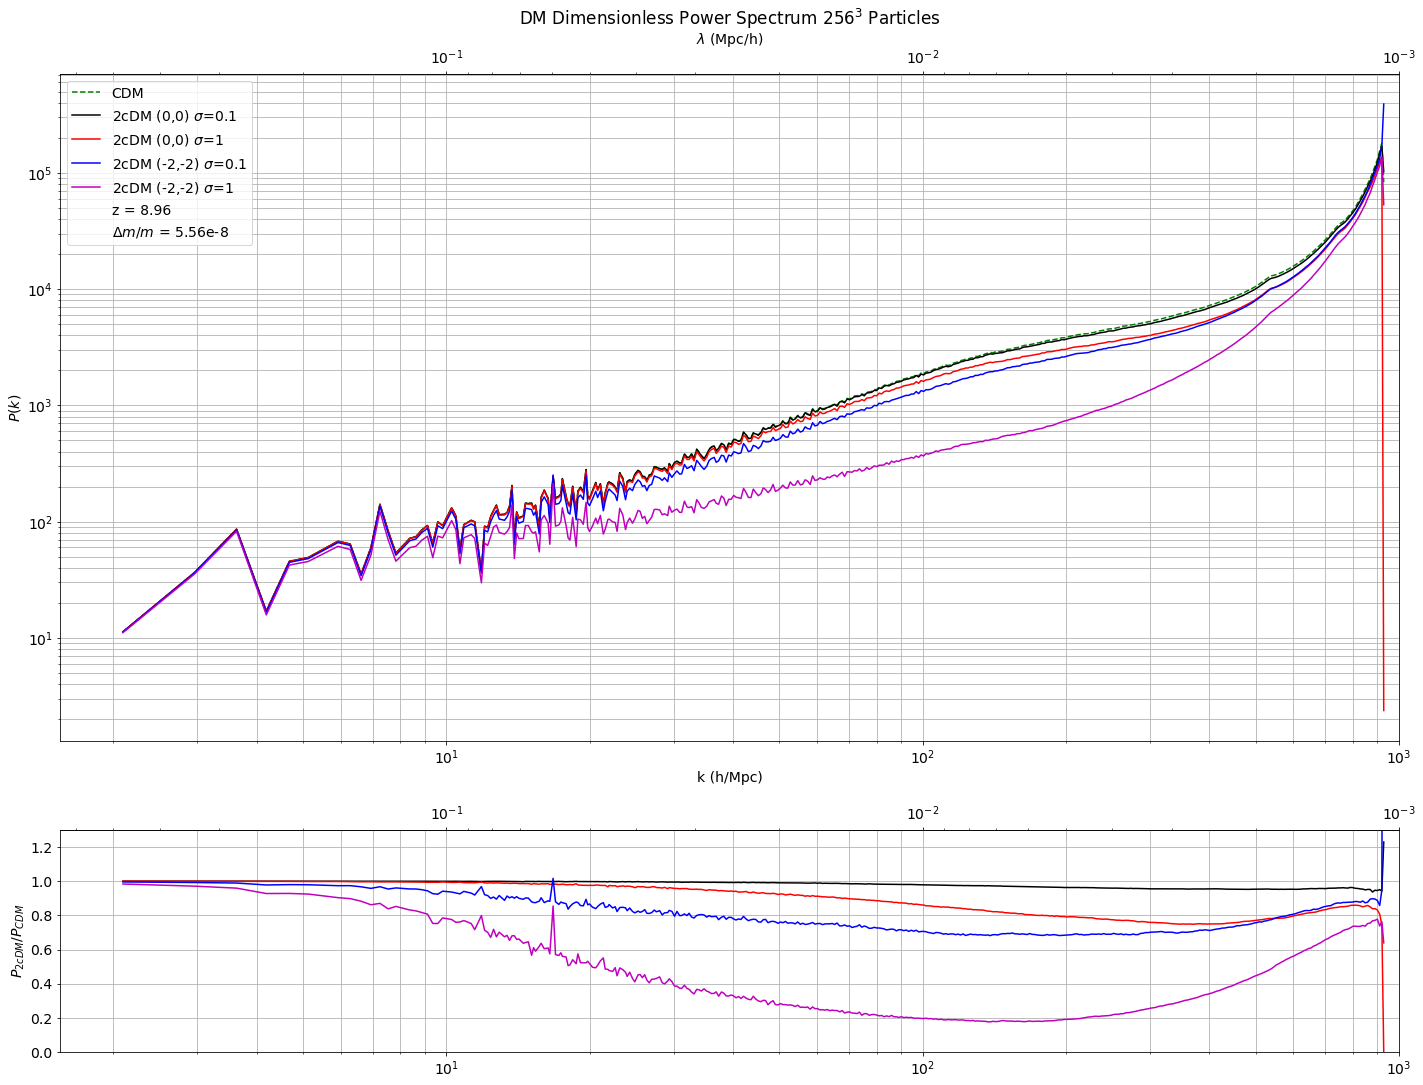

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[24,18], gridspec_kw={'height_ratios': [3, 1]})
ax0.plot(bins_cdm_1, dk_cdm_1, '--', label='CDM', color='g')
ax0.plot(bins_2cdm_1,dk_2cdm_1, label='2cDM (0,0) $\sigma$=0.1', color='k')
ax0.plot(bins_2cdm_2,dk_2cdm_2, label='2cDM (0,0) $\sigma$=1', color='r')
ax0.plot(bins_2cdm_3,dk_2cdm_3, label='2cDM (-2,-2) $\sigma$=0.1', color='b')
ax0.plot(bins_2cdm_4,dk_2cdm_4, label='2cDM (-2,-2) $\sigma$=1', color='m')
ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(redshift), alpha=0)
ax0.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax0.set_xlim(0, 10**3)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

ax0.set_title('DM Dimensionless Power Spectrum $256^{3}$ Particles')
ax0.grid(True, which="both", ls="-")
ax0.legend()

ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, label='2cDM (0,0) $\sigma$=0.1', color='k',)
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_1, label='2cDM (0,0) $\sigma$=1', color='r')
ax1.plot(bins_2cdm_2 ,pk_2cdm_3 / pk_cdm_1, label='2cDM (-2,-2) $\sigma$=0.1', color='b')
ax1.plot(bins_2cdm_2 ,pk_2cdm_4 / pk_cdm_1, label='2cDM (-2,-2) $\sigma$=1', color='m')
#ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')


ax1.set_xlim(0, 10**3)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

#ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_2))
ax1.grid(True, which="both", ls="-")
#ax1.legend()

fname = f'z_{redshift}_DM_Spectrum_with_Ratio_256.png'
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


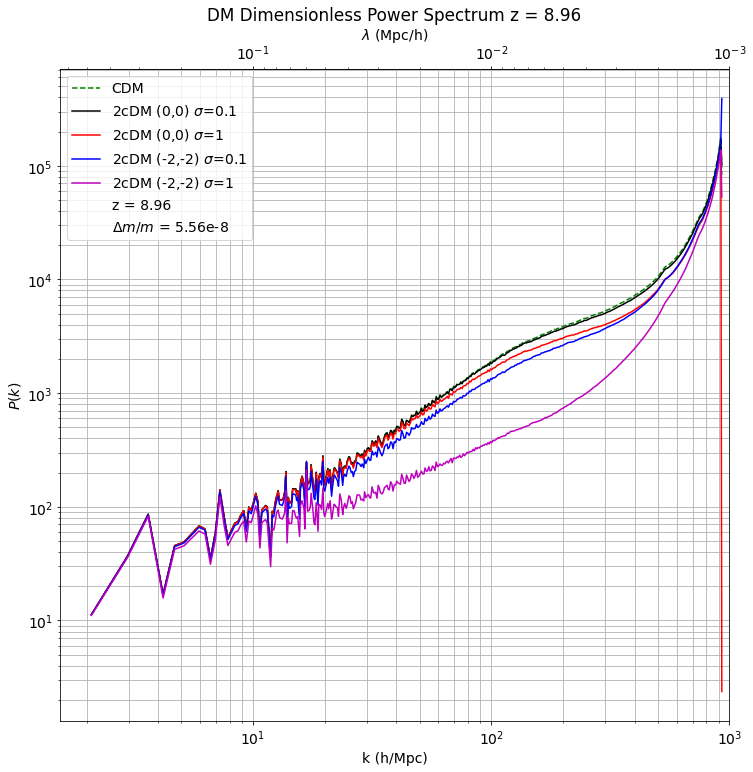

In [10]:
fig, ax0 = plt.subplots(1, 1, figsize=[12,12])
ax0.plot(bins_cdm_1, dk_cdm_1, '--', label='CDM', color='g')
ax0.plot(bins_2cdm_1,dk_2cdm_1, label='2cDM (0,0) $\sigma$=0.1', color='k')
ax0.plot(bins_2cdm_2,dk_2cdm_2, label='2cDM (0,0) $\sigma$=1', color='r')
ax0.plot(bins_2cdm_3,dk_2cdm_3, label='2cDM (-2,-2) $\sigma$=0.1', color='b')
ax0.plot(bins_2cdm_4,dk_2cdm_4, label='2cDM (-2,-2) $\sigma$=1', color='m')
ax0.set_xlabel('k (h/Mpc)')
ax0.set_ylabel('$P(k)$')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.plot([],[], label='z = {}'.format(redshift), alpha=0)
ax0.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax0.set_xlim(0, 10**3)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax0 = ax0.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax0.set_xlabel('$\lambda$ (Mpc/h)')

ax0.set_title('DM Dimensionless Power Spectrum z = {}'.format(redshift))
ax0.grid(True, which="both", ls="-")
ax0.legend()

fname = f'z_{redshift}_DM_Spectrum_256.png'
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


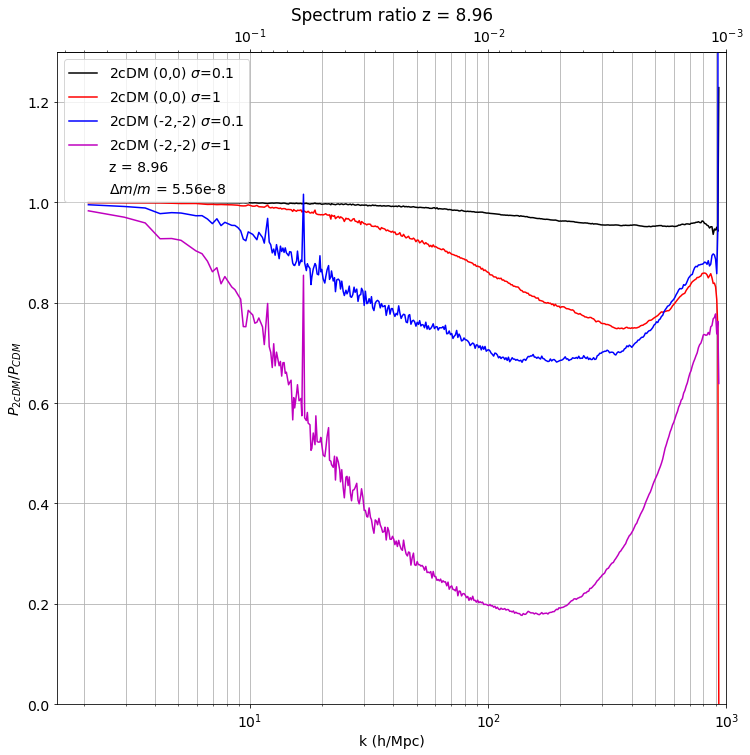

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=[12,12])

ax1.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, label='2cDM (0,0) $\sigma$=0.1', color='k',)
ax1.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_1, label='2cDM (0,0) $\sigma$=1', color='r')
ax1.plot(bins_2cdm_2 ,pk_2cdm_3 / pk_cdm_1, label='2cDM (-2,-2) $\sigma$=0.1', color='b')
ax1.plot(bins_2cdm_2 ,pk_2cdm_4 / pk_cdm_1, label='2cDM (-2,-2) $\sigma$=1', color='m')
ax1.set_xlabel('k (h/Mpc)')
ax1.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax1.set_xscale('log')
#ax.set_yscale('log')

ax1.plot([],[], label='z = {}'.format(redshift), alpha=0)
ax1.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax1.set_xlim(0, 10**3)
ax1.set_ylim(0, 1.3)

sax1 = ax1.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
#sax1.set_xlabel('$\lambda$ (Mpc/h)')

ax1.set_title('Spectrum ratio z = {}'.format(redshift))
ax1.grid(True, which="both", ls="-")
ax1.legend()

fname = f'z_{redshift}_DM_Ratio_256.png'
plt.savefig(fpath+fname, dpi=150)
plt.show()